

---

# Ejercitación

Partiendo de la base de datos Diplo_DB creada en clase, se pide:

1. Mostrar los datos del cliente que más compras realizó durante el año 2021

2. Se quiere saber cuál es el país del cliente que más dinero gastó en una sola compra.

3. Se quiere saber cual es el monto y el número de la factura de mayor valor que solo incluya Resmas de papel en cualquier tamaño.

4. Se quiere saber cuáles fueron los tres artículos con más unidades vendidas.

5. Se quiere saber cuáles fueron los tres artículos con menos unidades vendidas.

6. Se pide graficar la evolución de los precios de las resmas de papel a través de los meses.

7. Persistir la información de la base de datos en formato CSV. ¿Cuál sería la 7orma que recomendarían para hacer esto y por qué?


Nota: Están disponibles en el repositorio las sentencias de creación de las tablas en lenguaje SQLServer por si quieren hacer pruebas en dicho motor de BD




---

# Resolución

**Creación de Tablas**

Se crean las tablas y se insertan los datos para trabajar.

In [ ]:
'''

    Clientes                    Facturas                    Detalles                    Articulos
  +------------------+        +------------------+        +------------------+        +------------------+      
  | PK ClienteID     |1-----OO| PK FacturaID     |1-----OO| PK FacturaID     |OO-----1| PK ArticuloID    |
  |    Nombre        |        |    ClienteID     |        | PK ArticuloID    |        |    Descripcion   |
  |    Direccion     |        |    Fecha         |        |    Cantidad      |        |    Precio        |
  |    Ciudad        |        |                  |        |    Precio        |        |                  |
  |    CP            |        +------------------+        +------------------+        +------------------+
  |    Pais          |
  +------------------+

'''

In [ ]:
import sqlite3

connection=sqlite3.connect("Diplo_DB.db") # Al ejecutar esta linea por primera vez creara la base de datos en la misma ubicación que nuestro script.
# Las veces sucesivas, solo se conectará.


try:
    connection.execute("""CREATE TABLE Clientes (
                            ClienteID INTEGER PRIMARY KEY AUTOINCREMENT,
                            Nombre TEXT,
                            Direccion TEXT,
                            Ciudad TEXT,
                            CP INTEGER,
                            Pais TEXT
                        )""")
    print('Tabla Clientes creada')
except sqlite3.OperationalError:
    print("Error al crear la tabla")
connection.close() # Luego de ejecutar las instrucciones, es una buena práctica siempre cerrar la conexión.

connection=sqlite3.connect("Diplo_DB.db") # Al ejecutar esta linea por primera vez creara la base de datos en la misma ubicación que nuestro script.
# Las veces sucesivas, solo se conectará.

try:
    connection.execute("""CREATE TABLE Articulos(
                            ArticuloID INTEGER PRIMARY KEY AUTOINCREMENT,
                            Descripcion TEXT,
                            Precio REAL
                          )""")
    print('Tabla Articulos creada')
except sqlite3.OperationalError:
    print("Error al crear la tabla")
connection.close()

connection=sqlite3.connect("Diplo_DB.db")
try:
    connection.execute("""CREATE TABLE Facturas (
                            FacturaID INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
                            ClienteID INTEGER NOT NULL,
                            Fecha TEXT NOT NULL,
                            FOREIGN KEY (ClienteID) REFERENCES Clientes (ClienteID) 
                        )""")
    print('Tabla Facturas creada')
except sqlite3.OperationalError:
    print("Error al crear la tabla")
connection.close()

connection=sqlite3.connect("Diplo_DB.db")
try:
    connection.execute("""CREATE TABLE Detalles (
                            FacturaID INTEGER  NOT NULL,
                            ArticuloID INTEGER  NOT NULL,
                            Cantidad INTEGER NOT NULL,
                            Precio REAL NOT NULL,
                            PRIMARY KEY (FacturaID, ArticuloID),
                            FOREIGN KEY (FacturaID) REFERENCES Facturas (FacturaID),
                            FOREIGN KEY (ArticuloID) REFERENCES Articulos (ArticuloID)
                        )""")
    print('Tabla Detalles creada')
except sqlite3.OperationalError:
    print("Error al crear la tabla")
connection.close()

connection=sqlite3.connect("Diplo_DB.db")
cursor = connection.cursor()
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio) 
              VALUES ('Resma A4', 148.0)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Resma Oficio', 150.0)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio) 
              VALUES ('Resma Carta', 149.0)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Teclado', 1150.50)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Mouse', 848.0)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Lapicera azul BIC', 110.0)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Carpeta Oficio', 750.0)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Goma de borrar', 150.75)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Corrector líquido', 290)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Repuesto agenda 2022', 780.75)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Lapiz negro', 89)''')
cursor.execute('''INSERT INTO Articulos(Descripcion, Precio)
              VALUES ('Goma de borrar', 97)''')
connection.commit() # Hacemos commit para persistir los cambios en la base
print('Cambios insertados')
cursor.close()
connection.close()

connection=sqlite3.connect("Diplo_DB.db")
cursor = connection.cursor()
cursor.execute('''INSERT INTO Clientes(Nombre, Direccion, Ciudad, CP, Pais) 
              VALUES ('Juan Lopez', 'Lima 956', 'CABA', 1582, 'Argentina')''')
cursor.execute('''INSERT INTO Clientes(Nombre, Direccion, Ciudad, CP, Pais) 
              VALUES ('Esteban Fernandez', 'Perú 867', 'CABA', 2652, 'Argentina')''')
cursor.execute('''INSERT INTO Clientes(Nombre, Direccion, Ciudad, CP, Pais) 
              VALUES ('Anibal Freijo', 'Estados Unidos 230', 'Lima', 4282, 'Perú')''')
cursor.execute('''INSERT INTO Clientes(Nombre, Direccion, Ciudad, CP, Pais) 
              VALUES ('Anthony Kiedis', '152 street 4242', 'California', 122, 'Estados Unidos')''')
cursor.execute('''INSERT INTO Clientes(Nombre, Direccion, Ciudad, CP, Pais) 
              VALUES ('Antonio Quispe', 'Lavalle 2552', 'La paz', 65182, 'Bolivia')''')
cursor.execute('''INSERT INTO Clientes(Nombre, Direccion, Ciudad, CP, Pais) 
              VALUES ('Jorge Poroto', 'Av. Rivadavia 25425', 'Buenos Aires', 1522, 'Argentina')''')
cursor.execute('''INSERT INTO Clientes(Nombre, Direccion, Ciudad, CP, Pais) 
              VALUES ('Manuel Benitez', 'De la palma 1254', 'Mburucuyá', 12822, 'Argentina')''')
connection.commit() # Hacemos commit para persistir los cambios en la base
print('Cambios insertados')
cursor.close()
connection.close()

connection=sqlite3.connect("Diplo_DB.db")
cursor = connection.cursor()
cursor.execute('''INSERT INTO Facturas (ClienteID, Fecha) 
              VALUES (1, '2022-10-05')''')
cursor.execute('''INSERT INTO Facturas (ClienteID, Fecha) 
              VALUES (1, '2021-10-06')''')
cursor.execute('''INSERT INTO Facturas (ClienteID, Fecha) 
              VALUES (3, '2022-02-16')''')
cursor.execute('''INSERT INTO Facturas (ClienteID, Fecha) 
              VALUES (3, '2021-12-26')''')
cursor.execute('''INSERT INTO Facturas (ClienteID, Fecha) 
              VALUES (3, '2021-10-06')''')
cursor.execute('''INSERT INTO Facturas (ClienteID, Fecha) 
              VALUES (2, '2021-08-12')''')
cursor.execute('''INSERT INTO Facturas (ClienteID, Fecha) 
              VALUES (7, '2022-01-28')''')
cursor.execute('''INSERT INTO Facturas (ClienteID, Fecha) 
              VALUES (5, '2021-10-06')''')
connection.commit()
print('Cambios insertados')
cursor.close()
connection.close()

connection=sqlite3.connect("Diplo_DB.db")
cursor = connection.cursor()
''' Cliente 1'''
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (1, 1, 1, 148)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (1, 2, 1, 150)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (1, 3, 1, 149)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (2, 1, 2, 140)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (2, 2, 2, 140)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (2, 3, 2, 145)''')

''' Cliente 3'''
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (3, 4, 5, 1050.5)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (3, 5, 5, 840)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (4, 8, 10, 120)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (4, 9, 3, 250)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (4, 6, 11, 75)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (5, 7, 10, 500)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (5, 10, 1,  760.5)''')

''' Cliente 2''' 
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (6, 10, 2,  760.5)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (6, 1, 12,  85.75)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (6, 3, 3,  90.75)''')

''' Cliente 7''' 
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (7, 10, 3,  750.5)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (7, 1, 3,  145.5)''')

''' Cliente 5''' 
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (8, 12, 10,  97)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (8, 11, 7,  85)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (8, 3, 4,  110)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (8, 1, 4,  120)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (8, 9, 2, 280)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (8, 6, 7, 105)''')
cursor.execute('''INSERT INTO Detalles (FacturaID, ArticuloID, Cantidad, Precio)
				VALUES (8, 5, 1, 820.80)''')
connection.commit()
print('Cambios insertados')
cursor.close()
connection.close()


Tabla Clientes creada
Tabla Articulos creada
Tabla Facturas creada
Tabla Detalles creada
Cambios insertados
Cambios insertados
Cambios insertados
Cambios insertados


Se genera la Función query_db que recibirá un string con una consulta SQL. Realizará dicha consulta y devolverá un Data Frame con los resultados.

In [ ]:
import pandas as pd

'''Esta función recibirá la query como string y devolverá un DataFrame'''
def query_df(query_text):
  connection=sqlite3.connect("Diplo_DB.db")
  df = pd.read_sql_query(query_text, connection)
  connection.close()
  return df

**Consulta 1: Mostrar los datos del cliente que más compras realizó durante el año 2021**

Se debe encontrar el Cliente que más cantidad de Facturas tenga a su nombre en 2021.


In [ ]:
query = '''
        SELECT ClienteID, Nombre, MAX(Total) AS Cantidad_Facturas
        FROM 
          (
          SELECT COUNT(f.FacturaID) AS Total, c.CLienteID, c.Nombre
          FROM Facturas f
          LEFT JOIN Clientes c
          on c.ClienteID = f.ClienteID
          WHERE f.fecha LIKE '2021%' 
          GROUP BY c.ClienteID
          )
        '''
query_df(query)

,CLienteID,Nombre,Cantidad_Facturas
0,3,Anibal Freijo,2


In [ ]:
query='''
SELECT MAX(Total), ClienteID
FROM(
  SELECT COUNT(f.FacturaID) AS Total, c.ClienteID, c.Nombre
  FROM Facturas f
  LEFT JOIN Clientes c
  on c.ClienteID = f.ClienteID
  WHERE f.fecha LIKE '2021%' 
  GROUP BY c.ClienteID
  )
GROUP BY ClienteID
'''
query_df(query)

,MAX(Total),ClienteID
0,1,1
1,1,2
2,2,3
3,1,5


**Consulta 2: Se quiere saber cuál es el país del cliente que más dinero gastó en una sola compra**

Necesitamos encontrar la Factura con mayor monto y luego buscar al Cliente correspondiente a dicha Factura.


In [ ]:
# Se buscan las Facturas con el Monto Total
query2='''
        SELECT SUM(Cantidad*Precio) AS Monto_Factura, facturaID
        FROM Detalles
        GROUP BY FacturaID
      '''
print(query_df(query2))

# Se usa la Query anterior anidada (con alias d) seleccionando la Factura de mayor monto 
query2='''
      SELECT c.Pais, c.Nombre, d.FacturaID, MAX(d.Monto_Factura) AS Monto_Maximo
      FROM
      (
        SELECT SUM(Cantidad*Precio) AS Monto_Factura, facturaID
        FROM Detalles
        GROUP BY FacturaID
      ) d
      LEFT JOIN Facturas f ON f.FacturaID = d.FacturaID
      LEFT JOIN Clientes c ON f.ClienteID = c.ClienteID
      '''

query_df(query2)

   Monto_Factura  FacturaID
0         447.00          1
1         850.00          2
2        9452.50          3
3        2775.00          4
4        5760.50          5
5        2822.25          6
6        2688.00          7
7        4600.80          8


,Pais,Nombre,facturaID,Monto_Maximo
0,Perú,Anibal Freijo,3,9452.5


**Consulta 3: Se quiere saber cual es el monto y el número de la factura de mayor valor que solo incluya Resmas de papel en cualquier tamaño**
Se buscarán las Facturas que incluyan **solamente** resmas de papel y se seleccionará la de mayor monto.


In [ ]:
# Se buscan las Facturas NO que contengan resmas como items
query2 = '''
        SELECT DISTINCT d.FacturaID FROM Detalles d
        LEFT JOIN Articulos a
        ON d.ArticuloID = a.ArticuloID
        WHERE a.Descripcion NOT LIKE '%Resma%'
        '''
print(query_df(query2))

# Se buscan las Facturas que NO contengan resmas (con el Total por Factura calculado)
query2 = '''
        SELECT FacturaID, SUM(Cantidad*Precio) AS MontoTotal FROM Detalles
        WHERE FacturaID NOT IN
        (SELECT DISTINCT FacturaID FROM Detalles d
        LEFT JOIN Articulos a ON d.ArticuloID = a.ArticuloID
        WHERE a.Descripcion NOT LIKE '%Resma%')
        GROUP BY FacturaID
        ORDER BY MontoTotal DESC
        LIMIT 1
        '''
print(query_df(query2))


   FacturaID
0          3
1          4
2          5
3          6
4          7
5          8
   FacturaID  MontoTotal
0          2       850.0


**Consulta 3a: Se quiere saber cual es el monto y el número de la factura de mayor valor que incluya Resmas de papel en cualquier tamaño**

**No es lo pedido!!** Se buscarán las Facturas que incluyan resmas de papel y se seleccionará la de mayor monto.

In [ ]:
# Se buscan las Facturas que contengan resmas
query2 = '''
        SELECT DISTINCT d.FacturaID FROM Detalles d
        LEFT JOIN Articulos a
        ON d.ArticuloID = a.ArticuloID
        WHERE a.Descripcion LIKE '%Resma%'
        '''
print(query_df(query2))

# Se buscan las Facturas que contengan resmas (con el Total por Factura calculado)
query2 = '''
        SELECT FacturaID, SUM(Cantidad*Precio) AS MontoTotal FROM Detalles
        WHERE FacturaID IN
        (SELECT DISTINCT FacturaID FROM Detalles d
        LEFT JOIN Articulos a ON d.ArticuloID = a.ArticuloID
        WHERE a.Descripcion LIKE '%Resma%')
        GROUP BY FacturaID
        ORDER BY MontoTotal DESC
        LIMIT 1
        '''
print(query_df(query2))

   FacturaID
0          1
1          2
2          6
3          7
4          8
   FacturaID  MontoTotal
0          8      4600.8


**Consulta 4: Se quiere saber cuáles fueron los tres artículos con más unidades vendidas**

Se sumarán las cantidades de cada artículo y se seleccionarán los 3 mayores.


In [ ]:
# Se buscan en Detalles los artículos vendidos
query2 = '''
        SELECT d.ArticuloID, SUM(d.Cantidad) AS Cantidad_Total, a.Descripcion 
        FROM Detalles d
        LEFT JOIN Articulos a
        ON d.ArticuloID = a.ArticuloID
        GROUP BY d.ArticuloID
        ORDER BY Cantidad_Total DESC
        '''
df = query_df(query2)
print(df)
print()

# Vemos que hay 4 artículos con 10 unidades vendidas. Si incluímos sólo el primero:
print('Top 3 Artículos más vendidos (exclusivo):')
print(df.head(3))
print()

# Si los queremos incluir a todos hay que filtrar el DF.
# Genero un array y lo ordeno de mayor a menor
cantidades = df['Cantidad_Total'].unique()
print(cantidades)
print()

tercero = cantidades[2]
print('Cantidad tercera más vendida: ' + str(tercero) + '\n')

df1 = df[df['Cantidad_Total']>=tercero]
print('Top 3 Artículos más vendidos (inclusivo):')
print(df1)

    ArticuloID  Cantidad_Total           Descripcion
0            1              22              Resma A4
1            6              18     Lapicera azul BIC
2            3              10           Resma Carta
3            7              10        Carpeta Oficio
4            8              10        Goma de borrar
5           12              10        Goma de borrar
6           11               7           Lapiz negro
7            5               6                 Mouse
8           10               6  Repuesto agenda 2022
9            4               5               Teclado
10           9               5     Corrector líquido
11           2               3          Resma Oficio

Top 3 Artículos más vendidos (exclusivo):
   ArticuloID  Cantidad_Total        Descripcion
0           1              22           Resma A4
1           6              18  Lapicera azul BIC
2           3              10        Resma Carta

[22 18 10  7  6  5  3]

Cantidad tercera más vendida: 10

Top 3 Artícul

**Consulta 5: Se quiere saber cuáles fueron los tres artículos con menos unidades vendidas**

Se utiliza la misma query anterior y se filtra por lo menos vendido.



In [ ]:
print(df)
print()

print('Top 3 Artículos menos vendidos (exclusivo):')
print(df.tail(3))
print()

# Si los queremos incluir a todos hay que filtrar el DF.
# Genero un array y lo ordeno de mayor a menor
cantidades = df['Cantidad_Total'].unique()
print(cantidades)
print()

terceromenos = cantidades[-3]
print('Cantidad tercera memnos vendida: ' + str(terceromenos) + '\n')

df1 = df[df['Cantidad_Total']<=terceromenos]
print('Top 3 Artículos menos vendidos (inclusivo):')
print(df1)

    ArticuloID  Cantidad_Total           Descripcion
0            1              22              Resma A4
1            6              18     Lapicera azul BIC
2            3              10           Resma Carta
3            7              10        Carpeta Oficio
4            8              10        Goma de borrar
5           12              10        Goma de borrar
6           11               7           Lapiz negro
7            5               6                 Mouse
8           10               6  Repuesto agenda 2022
9            4               5               Teclado
10           9               5     Corrector líquido
11           2               3          Resma Oficio

Top 3 Artículos menos vendidos (exclusivo):
    ArticuloID  Cantidad_Total        Descripcion
9            4               5            Teclado
10           9               5  Corrector líquido
11           2               3       Resma Oficio

[22 18 10  7  6  5  3]

Cantidad tercera memnos vendida: 6

Top 3

**Consulta 6: Se pide graficar la evolución de los precios de las resmas de papel a través de los meses**




        Fecha  Precio   Descripcion
0  2022-10-05  148.00      Resma A4
1  2022-10-05  150.00  Resma Oficio
2  2022-10-05  149.00   Resma Carta
3  2021-10-06  140.00      Resma A4
4  2021-10-06  140.00  Resma Oficio
5  2021-10-06  145.00   Resma Carta
6  2021-08-12   85.75      Resma A4
7  2021-08-12   90.75   Resma Carta
8  2022-01-28  145.50      Resma A4
9  2021-10-06  110.00   Resma Carta
10 2021-10-06  120.00      Resma A4

       Fecha  Precio Descripcion
6 2021-08-12   85.75    Resma A4
3 2021-10-06  140.00    Resma A4
8 2022-01-28  145.50    Resma A4
0 2022-10-05  148.00    Resma A4
       Fecha  Precio   Descripcion
4 2021-10-06   140.0  Resma Oficio
1 2022-10-05   150.0  Resma Oficio
       Fecha  Precio  Descripcion
7 2021-08-12   90.75  Resma Carta
5 2021-10-06  145.00  Resma Carta
2 2022-10-05  149.00  Resma Carta


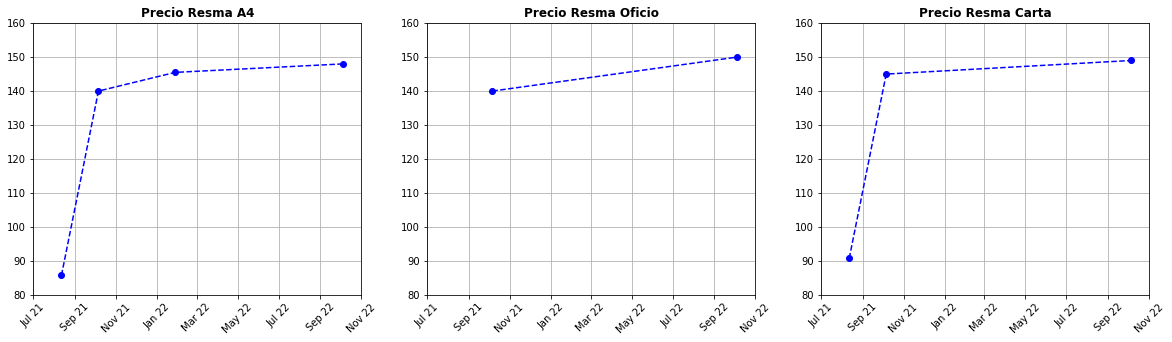

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime
from matplotlib.dates import DateFormatter

# Se buscan las Facturas (con el Total por articulo calculado) que incluya resmas de papel
query2 = '''
        SELECT f.Fecha, d.FacturaID, d.ArticuloID, d.Precio, a.Descripcion 
        FROM Detalles d
        LEFT JOIN Articulos a
        ON d.ArticuloID = a.ArticuloID
        LEFT JOIN Facturas f
        ON d.FacturaID = f.FacturaID
        WHERE a.Descripcion LIKE '%Resma%'
        '''
df = query_df(query2)
df.drop(['FacturaID', 'ArticuloID'], axis='columns', inplace=True)
df['Fecha']=pd.to_datetime(df['Fecha'], format='%Y-%m-%d')
print(df)
print()

# Veo los diferentes items del DF y grafico
items = df['Descripcion'].unique()

fig, ax = plt.subplots(1, len(items))
fig.set_size_inches(20, 5)
plt.subplots_adjust(wspace=0.2, hspace=0.1) 
plt.xticks(rotation = 45)

num = 0
for it in items: 
  ax[num].set_title('Precio ' + it, loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'k'})
  f0 = datetime.strptime('2021-07-01', '%Y-%m-%d')
  f1 = datetime.strptime('2022-11-01', '%Y-%m-%d')
  # Text in the x axis will be displayed in 'YYYY-mm' format
  ax[num].xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
  ax[num].tick_params(axis='x', labelrotation = 45)
  ax[num].grid(True)
  ax[num].set_xlim([f0, f1])
  ax[num].set_ylim([80, 160])

  data1 = df[df['Descripcion'] == it]
  data1 = data1.drop_duplicates(subset=['Fecha'])
  data1 = data1.sort_values(by='Fecha')
  print(data1)
  ax[num].plot(data1['Fecha'], data1['Precio'], color='blue', linestyle='dashed', marker='o')

  num = num + 1


**Persistir la información de la base de datos en formato CSV.** ¿Cuál sería la forma que recomendarían para hacer esto y por qué?

Se buscan todas las columnas de todas las tablas haciendo los JOIN con los campos comunes. Se genera una gran Tabla con todas las Facturas y Detalles de compra. En la Tabla final se tienen todos los datos pero se desperdicia mucho lugar al escribir muchas veces la misma información.

In [ ]:
query2 = '''
        SELECT f.Fecha, d.FacturaID, d.ArticuloID, d.Cantidad, d.Precio, a.Descripcion, c.Nombre, c.Direccion, c.Ciudad, c.CP, c.Pais
        FROM Detalles d
        LEFT JOIN Articulos a
        ON d.ArticuloID = a.ArticuloID
        LEFT JOIN Facturas f
        ON d.FacturaID = f.FacturaID
        LEFT JOIN Clientes c
        ON f.ClienteID = c.ClienteID
        ORDER BY f.Fecha, d.FacturaID, d.ArticuloID
        '''
df = query_df(query2)

# Guardo el DF en un archivo csv
df.to_csv('./sample_data/Facturas.csv')

df


,Fecha,FacturaID,ArticuloID,Cantidad,Precio,Descripcion,Nombre,Direccion,Ciudad,CP,Pais
0,2021-08-12,6,1,12,85.75,Resma A4,Esteban Fernandez,Perú 867,CABA,2652,Argentina
1,2021-08-12,6,3,3,90.75,Resma Carta,Esteban Fernandez,Perú 867,CABA,2652,Argentina
2,2021-08-12,6,10,2,760.50,Repuesto agenda 2022,Esteban Fernandez,Perú 867,CABA,2652,Argentina
3,2021-10-06,2,1,2,140.00,Resma A4,Juan Lopez,Lima 956,CABA,1582,Argentina
4,2021-10-06,2,2,2,140.00,Resma Oficio,Juan Lopez,Lima 956,CABA,1582,Argentina
5,2021-10-06,2,3,2,145.00,Resma Carta,Juan Lopez,Lima 956,CABA,1582,Argentina
6,2021-10-06,5,7,10,500.00,Carpeta Oficio,Anibal Freijo,Estados Unidos 230,Lima,4282,Perú
7,2021-10-06,5,10,1,760.50,Repuesto agenda 2022,Anibal Freijo,Estados Unidos 230,Lima,4282,Perú
8,2021-10-06,8,1,4,120.00,Resma A4,Antonio Quispe,Lavalle 2552,La paz,65182,Bolivia
9,2021-10-06,8,3,4,110.00,Resma Carta,Antonio Quispe,Lavalle 2552,La paz,65182,Bolivia
